In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as st
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [18]:
df = pd.read_stata('data/pension.dta')

In [19]:
df.describe()

,id,pyears,prftshr,choice,female,married,age,educ,finc25,finc35,finc50,finc75,finc100,finc101,wealth89,black,stckin89,irain89,pctstck
count,226.000000,218.000000,206.000000,226.000000,226.00000,226.000000,226.000000,219.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000,226.000000,226.000000,226.000000,226.00000,226.000000
mean,2445.092920,11.385321,0.208738,0.615044,0.60177,0.734513,60.703540,13.515982,0.208333,0.185185,0.245370,0.125000,0.12037,0.064815,197.905624,0.119469,0.318584,0.50000,46.681416
std,1371.270511,9.605498,0.407397,0.487665,0.49062,0.442572,4.287002,2.554627,0.407060,0.389350,0.431306,0.331487,0.32615,0.246771,242.091949,0.325060,0.466962,0.50111,39.441155
min,38.000000,0.000000,0.000000,0.000000,0.00000,0.000000,53.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-579.997009,0.000000,0.000000,0.00000,0.000000
25%,1312.500000,4.000000,0.000000,0.000000,0.00000,0.000000,57.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,52.000000,0.000000,0.000000,0.00000,0.000000
50%,2377.500000,9.000000,0.000000,1.000000,1.00000,1.000000,60.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,127.849998,0.000000,0.000000,0.50000,50.000000
75%,3804.250000,16.000000,0.000000,1.000000,1.00000,1.000000,64.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,247.500000,0.000000,1.000000,1.00000,100.000000
max,5014.000000,45.000000,1.000000,1.000000,1.00000,1.000000,73.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1484.996948,1.000000,1.000000,1.00000,100.000000


In [20]:
df.rename(columns = {'pctstck':'y'}, inplace = True)

In [21]:
df1 = st.add_constant(df, prepend = False)

C:\Users\DNS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
sub = df1[['y', 'choice', 'age', 'wealth89', 'prftshr', 'married']].dropna()
y = sub['y']
X = sub[['choice', 'age', 'wealth89', 'prftshr']]
X = st.add_constant(X, prepend = False)

C:\Users\DNS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
pd.crosstab(df['y'], df['educ'])

educ,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
y,,,,,,,,,,,
0,5,3,0,3,31,4,7,0,11,1,7
50,1,1,0,3,34,4,6,2,14,5,14
100,0,2,1,1,36,1,5,4,5,4,4


In [24]:
multmodel = st.MNLogit(y, X, )
mm_fit = multmodel.fit()
mm_fit.summary() ### сразу же можно проверить значимость коэффициентов

Optimization terminated successfully.
         Current function value: 1.056826
         Iterations 5


In [25]:
mm_fit.summary() ### сразу же можно проверить значимость коэффициентов

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  206
Model:                        MNLogit   Df Residuals:                      198
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                 0.03320
Time:                        20:58:09   Log-Likelihood:                -217.71
converged:                       True   LL-Null:                       -225.18
Covariance Type:            nonrobust   LLR p-value:                   0.02064
==============================================================================
      y=50       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
choice         0.7083      0.346      2.048      0.041       0.030       1.386
age           -0.0052      0.005     -1.015      0.310      -0.015       0.005
wealth89   -4.195e-05      0.001     -0.063      0.950      -0.001       0.001
prftshr       -0.4098      0.474     -0.865      0.387      -1.338       0.519
------------------------------------------------------------------------------
     y=100       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
choice         0.6419      0.370      1.733      0.083      -0.084       1.368
age           -0.0128      0.006     -2.237      0.025      -0.024      -0.002
wealth89      -0.0002      0.001     -0.257      0.797      -0.002       0.001
prftshr        0.9128      0.420      2.173      0.030       0.089       1.736
==============================================================================
"""

In [26]:
fitted_values = mm_fit.predict()

In [38]:
data_m = sub[(sub.married == 1)]
y_m = data_m['y']
X_m = data_m[['choice', 'age', 'wealth89', 'prftshr']]

In [42]:
multmodel_m = st.MNLogit(y_m, X_m)
mm_fit_m = multmodel_m.fit()
mm_fit_m.summary()

Optimization terminated successfully.
         Current function value: 1.035791
         Iterations 5


In [43]:
mm_fit_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  154
Model:                        MNLogit   Df Residuals:                      146
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                 0.04725
Time:                        21:05:53   Log-Likelihood:                -159.51
converged:                       True   LL-Null:                       -167.42
Covariance Type:            nonrobust   LLR p-value:                   0.01475
==============================================================================
      y=50       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
choice         1.1098      0.414      2.680      0.007       0.298       1.922
age           -0.0082      0.006     -1.298      0.194      -0.021       0.004
wealth89      -0.0003      0.001     -0.445      0.656      -0.002       0.001
prftshr        0.0574      0.535      0.107      0.915      -0.991       1.106
------------------------------------------------------------------------------
     y=100       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
choice         0.5338      0.439      1.216      0.224      -0.326       1.394
age           -0.0138      0.007     -2.010      0.044      -0.027      -0.000
wealth89   -4.126e-05      0.001     -0.051      0.959      -0.002       0.002
prftshr        1.2179      0.502      2.428      0.015       0.235       2.201
==============================================================================
"""

In [62]:
margeff = mm_fit_m.get_margeff()
np.round(margeff.margeff, 3)

array([[-0.187,  0.197, -0.01 ],
       [ 0.002, -0.   , -0.002],
       [ 0.   , -0.   ,  0.   ],
       [-0.114, -0.107,  0.221]])

In [100]:
y50_data = sub[sub['y'] == 50][sub.columns.difference(['y', 'married'])]
y100_data = sub[sub['y'] == 100][sub.columns.difference(['y', 'married'])]
#np.exp(mm_fit.params[0]*y100_data) # кажется, это придется считать вручную :(
#np.exp(mm_fit.params[0]*y100_data) # не уверена, что так, но пусть пока будет

Стоит признать, что с предельными эффектами в python беда :(

In [101]:
mm_fit_m.params ### покажет коэффициенты для каждой из альтернатив

,0,1
choice,1.109841,0.533820
age,-0.008244,-0.013767
wealth89,-0.000337,-0.000041
prftshr,0.057405,1.217890


In [110]:
data_nlsy = pd.read_stata('data/tradrole.dta')

plt.style.use('ggplot')

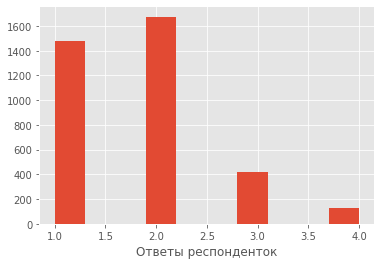

In [113]:
plt.hist(data_nlsy['tradrole'])
plt.title('')
plt.xlabel('Ответы респонденток')
plt.show('Вот такие дела, джентельмены :)')

In [114]:
### непонятно